# Armin Abbasi Najarzadeh - Assignment B-1


proof-of-work: https://github.com/R-m1n/SBU/tree/main/Machine%20Learning

## Importing Libraries

In [1]:
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt

## Importing Custom Libraries

In [2]:
from armain import Scaler, DataLoader, StochasticRegression

# Reading & Preprocessing Dataset

In [3]:
data = pd.read_csv("Dummy-Data-HSS.csv")
data.drop(columns=["Influencer"], inplace=True)
data.fillna(0, inplace=True)

data.head(10)

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
5,29.0,9.614382,1.027163,105.889148
6,55.0,24.893811,4.273602,198.679825
7,31.0,17.355042,2.289855,108.733932
8,76.0,24.648898,7.130116,270.189400
9,13.0,0.431128,2.229423,48.280582


### Defining a Scaler Object

In [4]:
scaler = Scaler()

### Plotting Scatter Matrix of Standardized Data

In [5]:
samples = data.head(50).copy(deep=True)

scaler.standardize(samples)

fig = px.scatter_matrix(samples, dimensions=["TV", "Radio", "Social Media", "Sales"])

fig.update_layout(
    title='Marketing Data',
    dragmode='select',
    width=1000,
    height=1000,
    hovermode='closest',
)

fig.show()

### Standardizing the Data (Excluding the Target Values)

In [6]:
scaler.standardize(data, exclude=["Sales"])

# Training & Evaluating Models

### Setting Hyperparameters

In [7]:
target_label = "Sales"
data_split = 0.8

epoch = 15
learning_rate = 0.0001

gaussian_parameter = 10
multiquadratic_parameter = 0.001

ridge = 1
lasso = 0.1

### Loading Data into multiple DataLoaders Based on Different Basis Functions

- Splitting Data into two Training and Validation Subsets
- Vectorizing Inputs (Features) and Output (Ground Truth)

In [8]:
linear_loader = DataLoader(data,
                           target_label=target_label,
                           split=data_split)

linear_loader.head(10)

,TV,Radio,Social Media,Sales
0,-1.447401,-1.195158,-0.185872,54.732757
1,-1.561825,-0.919390,-0.410942,46.677897
2,-0.493874,-0.233083,-0.183421,150.177829
3,1.108052,1.225849,1.626880,298.246340
4,-1.485542,-1.002007,-0.864125,56.594181
5,-0.951567,-0.880514,-1.035196,105.889148
6,0.040102,0.696698,0.430803,198.679825
7,-0.875285,-0.081488,-0.465001,108.733932
8,0.841065,0.671417,1.720722,270.189400
9,-1.561825,-1.828452,-0.492290,48.280582


- Applying the Guassian Radial Basis Function to all the Inputs (Features)

In [9]:
gaussian_loader = DataLoader(data, target_label=target_label,
                             split=data_split, basis="gaussian",
                             gaussian_parameter=gaussian_parameter)

gaussian_loader.head(10)

,TV,Radio,Social Media,Sales
0,0.989580,0.992883,0.999827,54.732757
1,0.987878,0.995783,0.999156,46.677897
2,0.998781,0.999728,0.999832,150.177829
3,0.993880,0.992515,0.986853,298.246340
4,0.989026,0.994992,0.996273,56.594181
5,0.995483,0.996131,0.994656,105.889148
6,0.999992,0.997576,0.999072,198.679825
7,0.996177,0.999967,0.998919,108.733932
8,0.996469,0.997749,0.985305,270.189400
9,0.987878,0.983423,0.998789,48.280582


- Applying the Multiquadratic Radial Basis Function to all the Inputs (Features)

In [10]:
multiquadratic_loader = DataLoader(data, target_label=target_label,
                                   split=data_split, basis="multiquadratic",
                                   multiquadratic_parameter=multiquadratic_parameter)

multiquadratic_loader.head(10)

,TV,Radio,Social Media,Sales
0,1.447402,1.195159,0.185874,54.732757
1,1.561825,0.919391,0.410943,46.677897
2,0.493875,0.233085,0.183424,150.177829
3,1.108053,1.225850,1.626880,298.246340
4,1.485543,1.002007,0.864125,56.594181
5,0.951568,0.880515,1.035196,105.889148
6,0.040114,0.696699,0.430804,198.679825
7,0.875285,0.081494,0.465002,108.733932
8,0.841065,0.671418,1.720722,270.189400
9,1.561825,1.828452,0.492291,48.280582


### Training the Linear Model

In [11]:
linear = StochasticRegression()

linear_train_rmsd, linear_val_rmsd = linear.train(linear_loader,
                                                  epoch=epoch,
                                                  learning_rate=learning_rate)

### Training the Guassian Model 

In [12]:
gaussian = StochasticRegression()

gaussian_train_rmsd, gaussian_val_rmsd = gaussian.train(gaussian_loader,
                                                        epoch=epoch,
                                                        learning_rate=learning_rate,
                                                        ridge=ridge)

### Training the Multiquadratic Model 

In [13]:
multiquadratic = StochasticRegression()

multiquadratic_train_rmsd, multiquadratic_val_rmsd = multiquadratic.train(multiquadratic_loader,
                                                                          epoch=epoch,
                                                                          learning_rate=learning_rate,
                                                                          ridge=ridge)

# Plotting the RMSD of Each Model per Epoch

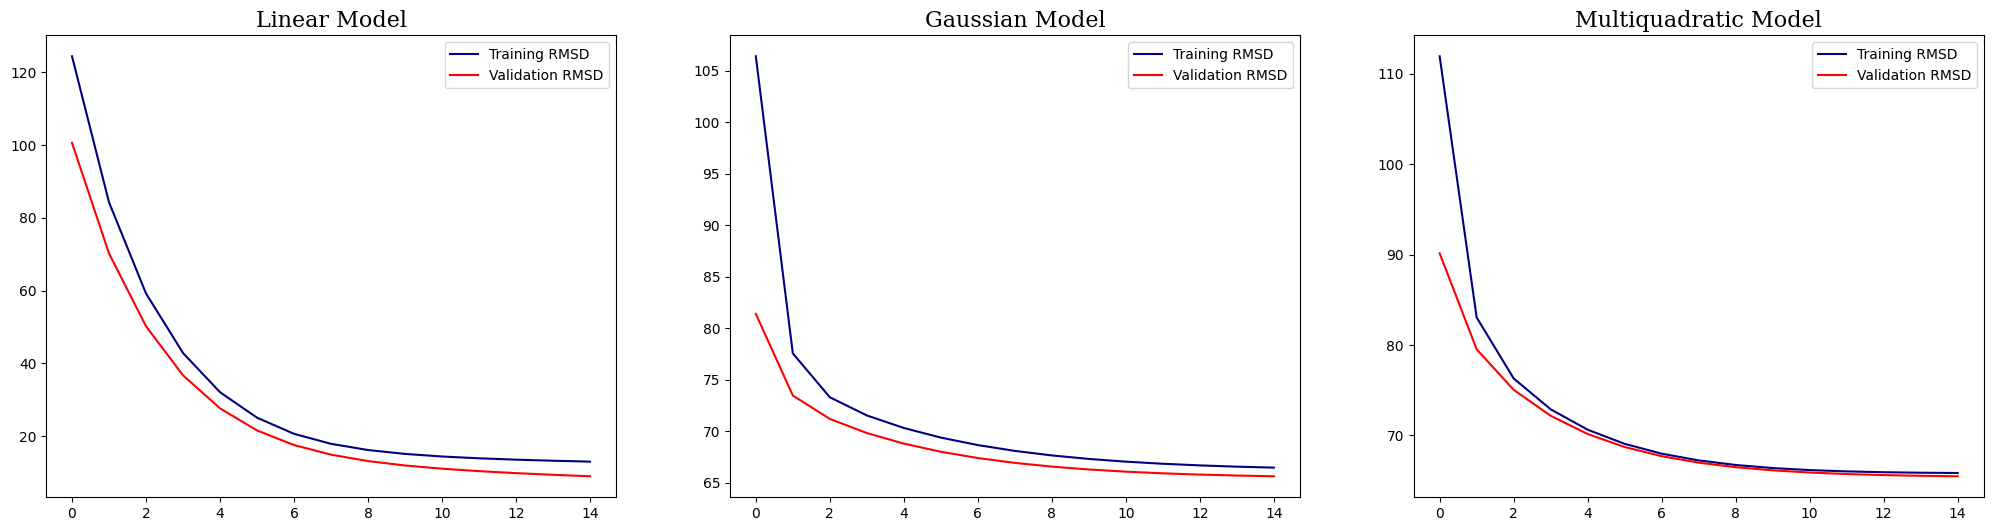

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

axs = axs.flatten()

axs[0].plot(linear_train_rmsd, color="navy", label="Training RMSD")
axs[0].plot(linear_val_rmsd, color="red", label="Validation RMSD")
axs[0].set_title("Linear Model", size=16, family="serif")
axs[0].legend(loc = "upper right")

axs[1].plot(gaussian_train_rmsd, color="navy", label="Training RMSD")
axs[1].plot(gaussian_val_rmsd, color="red", label="Validation RMSD")
axs[1].set_title("Gaussian Model", size=16, family="serif")
axs[1].legend(loc = "upper right")

axs[2].plot(multiquadratic_train_rmsd, color="navy", label="Training RMSD")
axs[2].plot(multiquadratic_val_rmsd, color="red", label="Validation RMSD")
axs[2].set_title("Multiquadratic Model", size=16, family="serif")
axs[2].legend(loc = "upper right")

plt.show()